# 분류 (Classification)
- 입력 데이터를 미리 정의되니 여러 클래스 중 하나로 예측하는 것
(범주형 데이터)

    - 이진 분류: 양성(1), 음성(0) 중에 하나를 맞추는 것
    - 다중 분류: 여러 클래스 중 하나를 맞추는 것것

In [ ]:
### Logistic Regression
- 선형 회귀 방식으로 분류 문제를 해결하는 모델
    - 이진 분류: 이진 분류를 위한 로지스틱 함수(시그모이드)를 통해 확률값을 계산하고 0 또는 1로 분류
    - 다중 분류: 다중 분류를 위한 소프트맥스 함수를 통해 확률값을 계산하고 여러 클래스 중 하나로 분류
    - 다중 레이블 분류: 하나의 데이터에 여러 개의 레이블을 분류
    - 다중 출력 분류: 하나의 데이터에 여러 개의 출력을 만드는 것

### 로지스틱 회귀 모델 적용
- 이진 분류
    - 예제 데이터: 유방암 예측
- 다중 분류
    - 예제 데이터: 와인 예측
- 다중 레이블 분류
    - 예제 데이터:  
- 다중 출력 분류
    - 예제 데이터: 
    

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>하이퍼파라미터</th>
      <th>설명</th>
      <th>기본값</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>penalty</code></td>
      <td>정규화의 종류 지정 / <code>'l1'</code>, <code>'l2'</code>, <code>'elasticnet'</code>, <code>'none'</code> 중 선택</td>
      <td><code>'l2'</code></td>
    </tr>
    <tr>
      <td><code>C</code></td>
      <td>정규화의 강도를 제어 / 값이 작을수록 강한 정규화 적용 (<code>1 / λ</code>로 해석 가능)</td>
      <td><code>1.0</code></td>
    </tr>
    <tr>
      <td><code>solver</code></td>
      <td>최적화 알고리즘 선택 / <code>'newton-cg'</code>, <code>'lbfgs'</code>, <code>'liblinear'</code>, <code>'sag'</code>, <code>'saga'</code> 중 선택</td>
      <td><code>'lbfgs'</code></td>
    </tr>
    <tr>
      <td><code>max_iter</code></td>
      <td>최적화를 위한 최대 반복 횟수</td>
      <td><code>100</code></td>
    </tr>
    <tr>
      <td><code>multi_class</code></td>
      <td>다중 클래스 문제에서 사용할 전략 / <code>'auto'</code>, <code>'ovr'</code> (one-vs-rest), <code>'multinomial'</code> 중 선택</td>
      <td><code>'auto'</code></td>
    </tr>
    <tr>
      <td><code>fit_intercept</code></td>
      <td>절편을 학습할지 여부 / <code>True</code> 또는 <code>False</code></td>
      <td><code>True</code></td>
    </tr>
  </tbody>
</table>

**solver**

<table>
  <thead>
    <tr>
      <th>Solver</th>
      <th>설명</th>
      <th>특징</th>
      <th>추천 사용 상황</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>liblinear</strong></td>
      <td>선형 분류를 위한 라이브러리인 "LIBLINEAR"에서 유래, 작은 데이터셋이나 희소 데이터셋에 적합한 이중 좌표축 감소법(Dual Coordinate Descent Algorithm) 사용</td>
      <td>빠르고 메모리 효율적이며, L1 및 L2 정규화 모두를 지원</td>
      <td>작은 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
    <tr>
      <td><strong>newton-cg</strong></td>
      <td>Newton Conjugate Gradient 뉴턴법을 사용한 최적화 알고리즘, 큰 데이터셋에서도 효율적으로 동작</td>
      <td>L2 정규화를 지원하며, 대규모 데이터셋에 적합</td>
      <td>중대형 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>lbfgs</strong></td>
      <td>Broyden-Fletcher-Goldfarb-Shanno(BFGS) 알고리즘의 변형인 L-BFGS(Limited-memory Broyden–Fletcher–Goldfarb–Shanno) 알고리즘을 사용</td>
      <td>L2 정규화를 지원하며, 메모리를 절약하면서도 효율적인 성능을 발휘</td>
      <td>대규모 데이터셋, 다중 클래스 분류</td>
    </tr>
    <tr>
      <td><strong>sag</strong></td>
      <td>Stochastic Average Gradient 하강법으로, 점진적으로 평균 그래디언트를 사용하여 최적화</td>
      <td>매우 큰 데이터셋에서 효율적이며, L2 정규화를 지원</td>
      <td>매우 큰 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>saga</strong></td>
      <td>Stochastic Average Gradient Augmented / sag의 확장판으로, L1 및 L2 정규화 모두를 지원</td>
      <td>희소 데이터셋에도 적합하며, 매우 큰 데이터셋에서 효율적</td>
      <td>매우 큰 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
  </tbody>
</table>

#### 이진 분류를 위한 Sigmoid 함수
- 선형회귀식을 통해 도출한 예측값(z)을 0과 1 사이의 수로 변환해주는 활성화 함수(Activation Function)

$
    시그모이드(z) = \frac{1}{1 + e^{-z}}
$

In [ ]:
z : 회귀식을 통해서 도출된 예측값
e : 자연상수

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

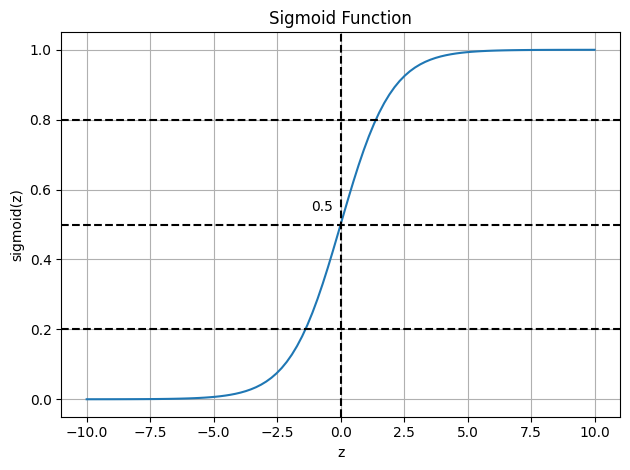

In [ ]:
z = np.linspace(-10, 10, 100) # z: 선형회귀 결과값, -10부터 10까지 100개의 수

sigmoid = 1 / (1 + np.exp(-z)) # 시그모이드 함수

plt.plot(z, sigmoid)

plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.title('Sigmoid Function')

plt.axvline(0, color='k', linestyle='--')
plt.axhline(0.5, color='k', linestyle='--')
plt.axhline(0.8, color='k', linestyle='--')
plt.axhline(0.2, color='k', linestyle='--')
plt.text(-0.75, 0.55, '0.5', ha='center', va='center')

plt.tight_layout()
plt.show()



In [21]:
fish_df = pd.read_csv('./data/fish.csv')
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [23]:
fish_df.Species.value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [22]:
fish_df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [27]:
is_bream_or_smelt = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
is_bream_or_smelt.value_counts()

Species
False    110
True      49
Name: count, dtype: int64

In [28]:
fish_df = fish_df[is_bream_or_smelt]
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [29]:
fish_df.describe()

,Weight,Length,Diagonal,Height,Width
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,444.500000,27.055102,31.120408,11.476400,4.259751
std,328.143233,10.242804,12.097296,6.150976,1.967686
min,6.700000,9.800000,10.800000,1.728400,1.047600
25%,19.700000,14.300000,15.200000,2.872800,1.879200
50%,500.000000,31.000000,36.200000,14.179500,5.072800
75%,700.000000,34.500000,39.700000,15.633000,5.589000
max,1000.000000,41.000000,46.500000,18.957000,6.749700


In [37]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   49 non-null     object 
 1   Weight    49 non-null     float64
 2   Length    49 non-null     float64
 3   Diagonal  49 non-null     float64
 4   Height    49 non-null     float64
 5   Width     49 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [30]:
# 데이터 분리 및 정규화 (X-y 데이터 분리 / 훈련-평가 데이터 분리 /정규화)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 특성-라벨 데이터 분리
X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

# 훈련-평가 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fir_transform 은 훈련 데이터만 정규화
X_test_scaled = scaler.transform(X_test) # transform 은 훈련 데이터와 평가 데이터 모두 정규화

In [31]:
# 모델 생성 및 훈련
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test)

(1.0, 1.0)

In [ ]:
# 분류 모델이기 때문에 평가 모델로 Accuracy 사용
# 평가 모델로 정확도 확인
from sklearn.metrics import accuracy_score

y_pred = lr_clf.predict(X_test_scaled[:3]) # array(['Bream', 'Smelt', 'Smelt'], dtype=object)

print(lr_clf.classes_) # 모델이 가지고 있는 분류 카테고리 확인 ['Bream' 'Smelt']
print(lr_clf.predict_proba(X_test_scaled[:3])) # 예측 확률 확인, 클래스별 확률

['Bream' 'Smelt']
[[0.98159822 0.01840178]
 [0.04990096 0.95009904]
 [0.09298277 0.90701723]]


In [ ]:
최적의 손실함수, 비용함수, 가중치를 찾는 것이 목표
.predict_proba는 확률값을 출력하는 함수
.classes_는 예측 확률이 가장 높은 클래스를 출력하는 함수
.coef_는 가중치를 출력하는 함수
.intercept_는 절편을 출력하는 함수
.predict는 예측 확률이 가장 높은 클래스를 출력하는 함수


In [47]:
print(lr_clf.coef_)
print(lr_clf.intercept_)
print(lr_clf.predict([[20, 200, 10, 10, 10]]))

[[-0.57717269 -0.79233938 -0.82533982 -0.86579233 -0.82205625]]
[-2.38186126]
['Bream']


In [49]:
print(lr_clf.coef_[0].shape)

(5,)


In [ ]:
# w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + b

# X -> 선형회귀값 계산
# np.dot(X_test_scaled[:3], lr_clf.coef_)
# ValueError: shapes (3,5) and (1,5) not aligned: 5 (dim 1) != 1 (dim 0)

# np.dot(X_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_
# X_test_scaled[:3] (3,5) 행렬, lr_clf.coef_[0] (5,) 행렬
# 행렬 곱셈 조건 만족 -> 브로드캐스팅 적용해서 계산 (3,5) * (5,)

# 선형회귀값 + 절편
# z = np.dot(X_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_[0]
# array([-3.97673464,  2.94652601,  2.27774726])

z = lr_clf.decision_function(X_test_scaled[:3])
# decision_function은 선형회귀값을 출력하는 함수
# [-3.97673464  2.94652601  2.27774726]
print(z)

# 시그모이드 함수 적용 -> 결과값
sigmoid = 1 / (1 + np.exp(-z))
print(sigmoid)


[-3.97673464  2.94652601  2.27774726]
[0.01840178 0.95009904 0.90701723]


In [59]:
# 결과값 -> 최종 분류 결과
# [print(1) if sigmoid >= 0.5 else print(0) for sigmoid in sigmoid]

result_arr =['Smelt' if value >= 0.5 else 'Bream' for value in sigmoid]

# result_arr = []
# for value in sigmoid:
#     if value >= 0.5:
#         result_arr.append('Smelt')
#     else:
#         result_arr.append('Bream')

print(result_arr)

['Bream', 'Smelt', 'Smelt']
